In [2]:
with open("L18_CDS.fasta") as file:
    text=file.read()
    print(text)

>Pyrococcus
ATTCGTTACCTCAGGAAAAAGTCTAATGAAGAGAAAGTTAAGATATGGAAGGACATAGCT
TGGAGACTTGAAAGACCAAGGAGGCAGAGGGCCGAAGTAAACGTCAGCAGGATAAACAGG
TACGCGAAGGATGGAGACATGATAGTGGTTCCAGGGAGCGTTCTTGGGGCCGGCAAGATA
GAGAAGAAGGTCATTGTAGCTGCTTGGAAGTTCAGTGAAACTGCAAGGAGAAAAATCGAG
GAGGCCGGTGGGGAGGCCATAACGATTGAAGAGCTAATTAAGAGGAATCCAAAGGGAAGT
GGAGTAATAATTATGGAG
>Yeast
TACACTTTCTTAGCTCGTCGTACTGATGCTCCATTCAACAAGGTTGTCTTGAAGGCTTTG
TTCTTGTCTAAGATCAACAGACCACCTGTTTCTGTCTCTAGAATTGCTAGAGCTTTGAAG
CAAGAAGGTGCTGCTAACAAGACTGTTGTCGTTGTTGGTACTGTTACTGACGATGCCAGA
ATCTTTGAATTCCCAAAGACCACTGTTGCTGCTTTGAGATTCACTGCTGGTGCCAGAGCC
AAGATTGTTAAGGCTGGTGGTGAATGTATCACTTTGGATCAATTAGCTGTCAGAGCTCCA
AAGGGTCAAAACACTTTGATCTTGAGAGGTCCAAGAAACTCCAGAGAAGCTGTCAGACAC
TTCGGTATGGGTCCACACAAGGGTAAGGCTCCAAGAATCTTGTCCACCGGTAGAAAGTTC
GAAAGAGCTAGAGGTAGAAGAAGATCTAAGGGTTTCAAGGTG
>African_frog
TATCGATTCTTGGCTCGTCGTACCAACTCCAGTTTCAACCGGGTGGTTCTGAAGCGTCTG
TTCATGAGCCGAACCAACAGGCCACCCCTCTCTATGTCCCGTCTTATTCGCAAAATGAAA
TTGCAAGGACGTGAAAACAAGACTGCAGTGGTTGTGGGCTGTATCACAGAT

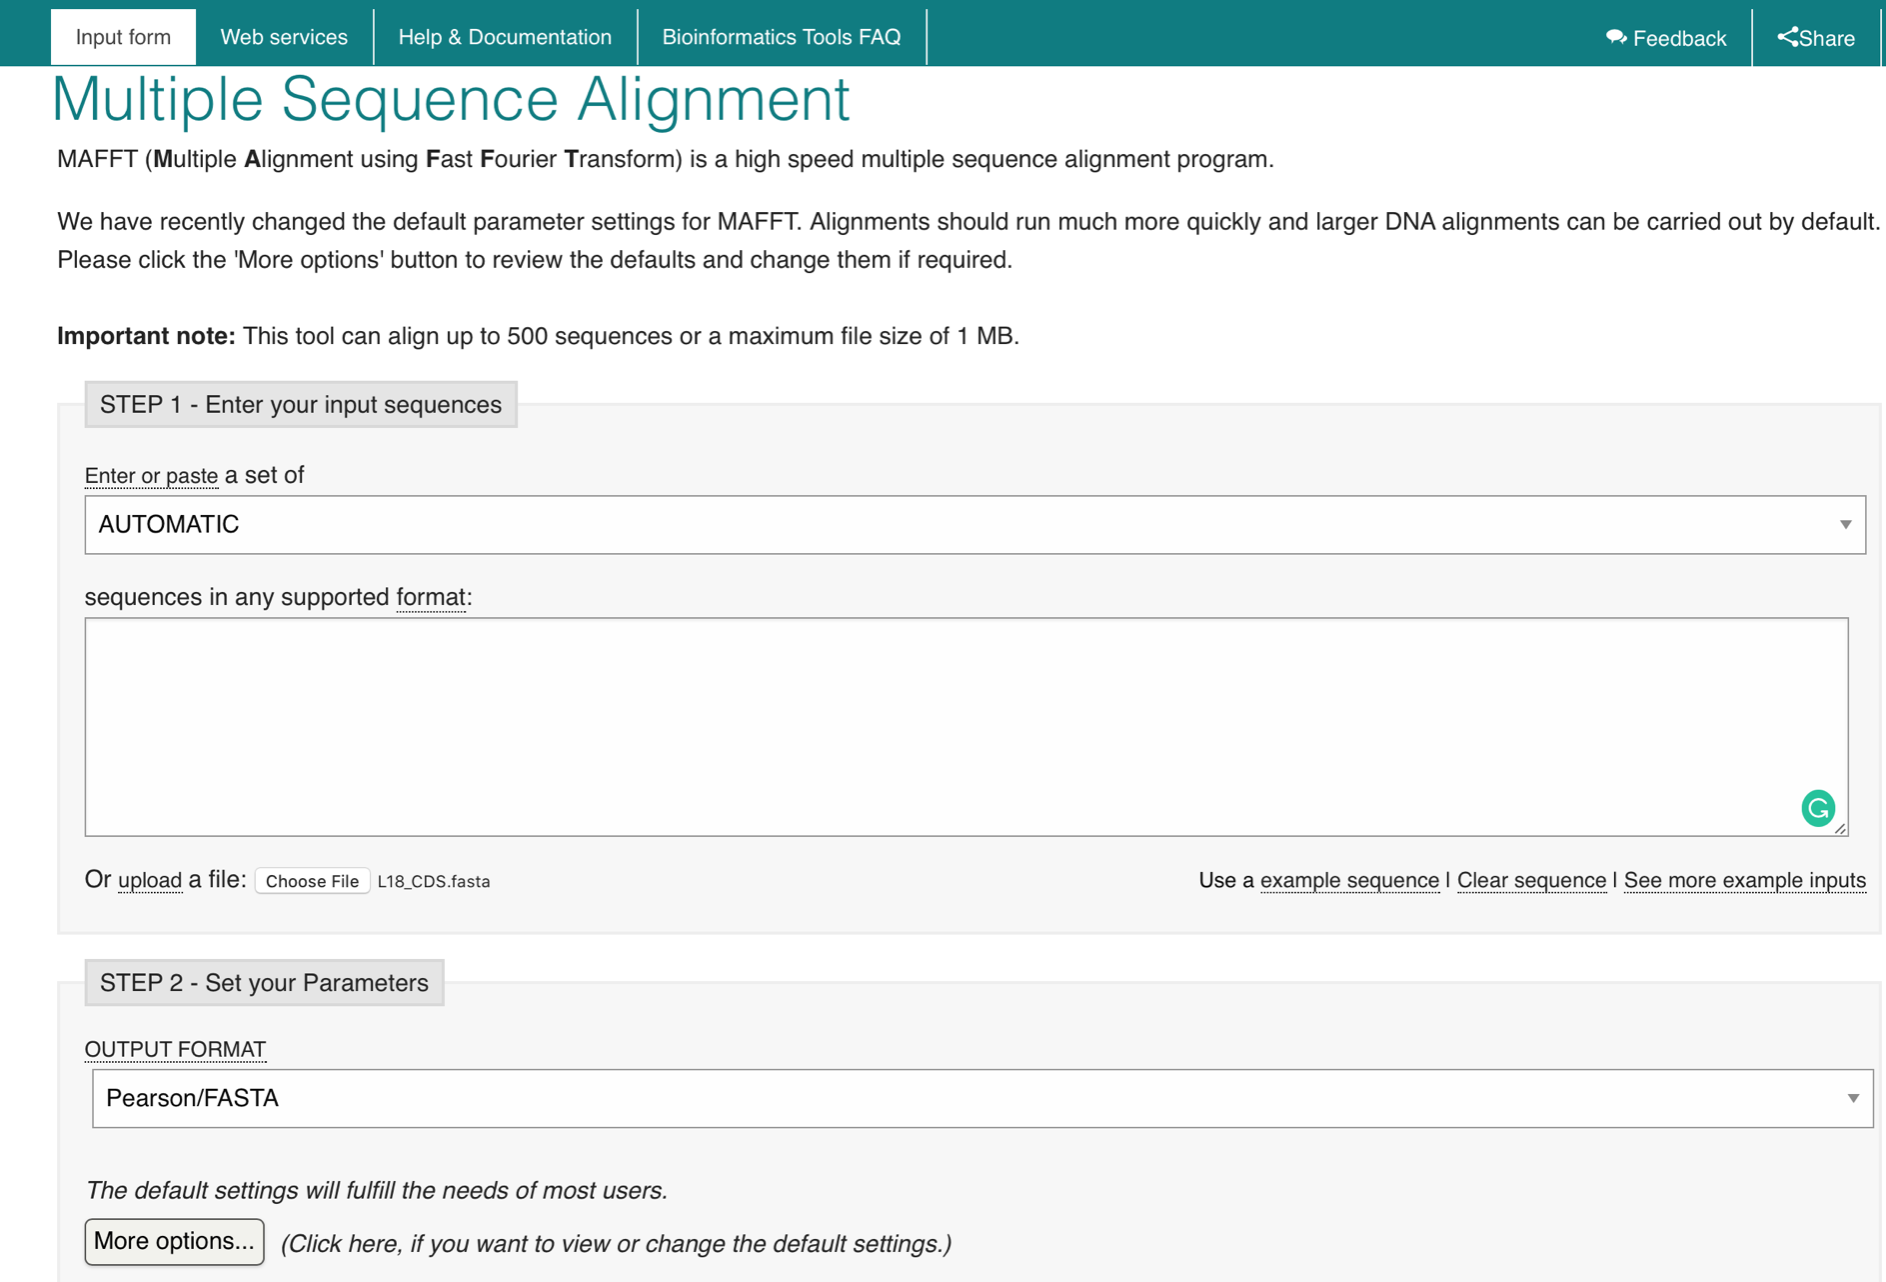

In [14]:
with open("L18_CDS_aligned.fasta") as file:
    text=file.read()
    print(text)

>Pyrococcus
ATTCGTTACCTCAGGAAAAAGTCTAATGAAGAGAAAGTTAAGATATGGAAGGACATAGCT
TGGAGACTTGAAAGACCAAGGAGGCAGAGGGCCGAAGTAAACGTCAGCAGGATAAACAGG
TACGCGAA------------------------------GGATGGAGACATGATAGTGGTT
CCAGGGAGCGTTCTTGGGGCCGGCAAGAT------AGAGAAGAAGGTCATTGTAGCTGCT
TGGAAGTTCAGTGAAACTGCAAGGAGAAAAATCGAGGAGGCCGGTGGGGAGGCCATAACG
ATTGAAGAGCTAATTAAGAGGAATCCAAAGGGAAGTGG----------------------
------------------------------------------------------------
------------------------AGTAATAATTATGGAG--------------------
------------------
>Methanocaldococcus_jannaschii
ATTGAGATATTAAAGCAGGAAAGTTATAAAAATCAGGCAAAGATTTGGAAGGATATTGCA
AGAAGGTTAGCAAAACCAAGAAGAAGGAGAGCAGAGGTAAATTTAAGTAAGATAAACAGA
TACACAAA------------------------------AGAAGGAGATGTTGTTTTAGTT
CCTGGTAAAGTTTTAGGAGCTGGGAAGTT------AGAGCACAAGGTTGTCGTTGCTGCA
TTTGCATTCTCAGAAACAGCTAAAAAATTAATTAAAGAAGCTGGAGGAGAAGCAATAACA
ATTGAAGAGCTAATAAAAAGAAATCCAAAAGGTTCAAA----------------------
------------------------------------------------------------
-----------------------

In [62]:
from Bio import SeqIO
from Bio.Cluster import kcluster
import numpy as np

seqs=[ str(s.seq) for s in SeqIO.parse("L18_CDS_aligned.fasta" , "fasta")]
matrix = np.asarray([np.fromstring(s, dtype=np.uint8) for s in seqs]) 
matrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


array([[65, 84, 84, ..., 45, 45, 45],
       [65, 84, 84, ..., 45, 45, 45],
       [84, 65, 67, ..., 71, 84, 71],
       ...,
       [84, 65, 67, ..., 71, 84, 84],
       [84, 65, 84, ..., 71, 84, 84],
       [84, 65, 67, ..., 71, 84, 65]], dtype=uint8)

In [55]:
# 1
# 2 clusters, Euclidean distance
cluster, error, nf = kcluster(matrix, 2, dist='e') 
cluster

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [47]:
# 2
# 3 clusters, Euclidean distance
cluster, error, nf = kcluster(matrix, 3, dist='e') 
cluster

array([2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int32)

In [52]:
# 3
# 4 clusters, Euclidean distance
cluster, error, nf = kcluster(matrix, 4, dist='e') 
cluster

array([1, 1, 0, 3, 3, 3, 2, 2, 2, 2, 0, 2, 2, 0, 2], dtype=int32)

In [53]:
# 4
# 2 clusters, City Block distance
cluster, error, nf = kcluster(matrix, 2, dist='b') 
cluster

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [69]:
from Bio.Cluster import treecluster as tcluster

In [71]:
treecluster=tcluster(matrix)
treecluster

In [72]:
from Bio.Cluster import distancematrix

In [86]:
dmatrix=distancematrix(matrix)
dmatrix

[array([], dtype=float64),
 array([36.13654618]),
 array([283.01606426, 288.27710843]),
 array([288.46184739, 291.36144578,  78.6184739 ]),
 array([269.17068273, 276.90160643,  72.29518072,  37.9497992 ]),
 array([260.76506024, 271.00200803,  73.70481928,  39.89759036,
         13.85943775]),
 array([266.19277108, 274.26907631,  68.72690763,  36.79518072,
         14.69277108,  13.73694779]),
 array([271.09036145, 276.57228916,  67.50401606,  38.83333333,
         16.61044177,  16.12449799,   6.1184739 ]),
 array([280.34538153, 284.96787149,  67.26104418,  35.41365462,
         20.75301205,  21.82128514,  15.24497992,  16.91365462]),
 array([273.13052209, 278.53614458,  67.01004016,  32.86947791,
         18.40963855,  18.31726908,  15.63253012,  17.13253012,
          7.86546185]),
 array([288.28313253, 299.84538153, 122.36746988,  69.86947791,
         75.32128514,  78.35742972,  71.28313253,  70.85542169,
         71.69277108,  72.40160643]),
 array([275.6184739 , 283.97590361,  69.